In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir(r"C:\Users\ruben\Desktop\DataPortfolio\Datasets\Amazon")

['database.sqlite', 'Reviews.csv']

In [3]:
# how to read data from a sqlite database

In [3]:
import sqlite3 as sql

In [4]:
con = sql.connect(r"C:\Users\ruben\Desktop\DataPortfolio\Datasets\Amazon\database.sqlite")

In [5]:
sql_df = pd.read_sql_query("SELECT * FROM REVIEWS", con)

In [6]:
sql_df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [7]:
sql_df.shape

(568454, 10)

In [8]:
sql_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [18]:
# "129 of 134 people found the review helpful" --> 129 = numerator / 134 = denominator

In [19]:
# if numerator bigger than the denominator, then we have invalid rows

In [7]:
sql_df[sql_df['HelpfulnessNumerator'] > sql_df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [34]:
sql_df = sql_df[sql_df['HelpfulnessNumerator'] <= sql_df['HelpfulnessDenominator']]

In [8]:
sql_df.shape

(568454, 10)

In [24]:
# if we have duplicate values considering this subset: 'UserId', 'ProfileName', 'Time', 'Text' we have to remove them

In [9]:
sql_df = sql_df.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'])

In [12]:
sql_df.shape

(393933, 10)

In [13]:
sql_df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [43]:
# converting column Time to datetime

In [10]:
sql_df["Time"] = pd.to_datetime(sql_df["Time"], unit='ns')
sql_df["Time"][0]

Timestamp('1970-01-01 00:00:01.303862400')

In [15]:
sql_df.dtypes

Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
dtype: object

In [55]:
# rounding the Time column to seconds

In [11]:
sql_df["Time"] = sql_df["Time"].dt.floor('s')

In [12]:
sql_df["Time"].head()

0   1970-01-01 00:00:01
1   1970-01-01 00:00:01
2   1970-01-01 00:00:01
3   1970-01-01 00:00:01
4   1970-01-01 00:00:01
Name: Time, dtype: datetime64[ns]

In [19]:
##QUESTION: to what kind of user should be recommend more products ##

In [20]:
# we should focus on users with high conversion rate

In [21]:
# to build an array of all the unique user names , we use the unique() function

In [13]:
sql_df['ProfileName'].unique()

array(['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', ...,
       'Lettie D. Carter', 'pksd "pk_007"', 'srfell17'], dtype=object)

In [23]:
# to count all the unique users

In [24]:
sql_df['ProfileName'].nunique()

218418

In [25]:
# this dataset allows to have duplicate Profile names, so we user UserID to avoid redundancy

In [27]:
sql_df['UserId'].nunique()

256059

In [28]:
# we will aggregate the userID's by highest amount of purchases, evaluations and summaries 
# we can use a dictionary to perform counts, avg calculations for each column

In [12]:
rec_df = sql_df.groupby(['UserId']).aggregate({'Summary': 'count', 'Text': 'count', 'Score': 'mean', 'ProductId': 'count'}).sort_values(['ProductId'], ascending=False)

In [37]:
# renaming the column names to make them more consistent

In [13]:
rec_df.columns = ['Total of Summaries', 'Total of Texts', 'Avg Score', 'Total of Purchases']

In [16]:
rec_df.head(10)

,Total of Summaries,Total of Texts,Avg Score,Total of Purchases
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


In [14]:
top10 = rec_df.index[0:10]

In [15]:
top10_values = rec_df['Total of Purchases'][0:10].values

In [53]:
# to get rid of the overlapping values

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

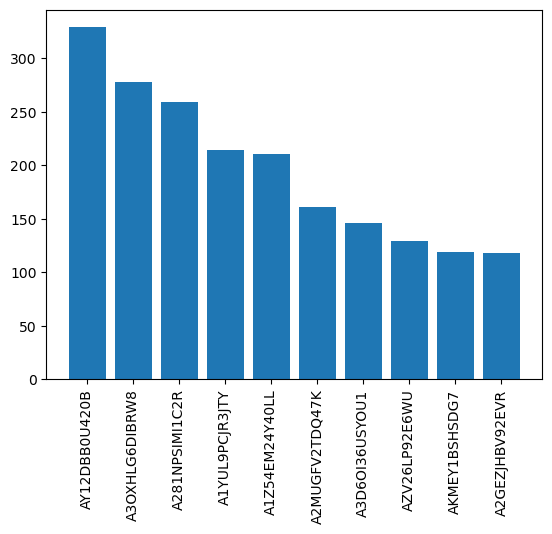

In [18]:
plt.bar(top10, top10_values)
plt.xticks(rotation='vertical')

In [56]:
# ANSWER: the bar plot shows us the top10 customers with the highest conversion rate

In [57]:
# QUESTION: which products have the best reviews?

In [58]:
# its smart to rephrase the question since we could pick products sold only once that have a stellar review

In [59]:
# QUESTION 2.0: which frequently sold products have the best reviews?

In [19]:
prod_count = sql_df['ProductId'].value_counts().to_frame()

In [20]:
prod_count.head(10)

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [21]:
biggerThen500 = prod_count[prod_count['count'] > 500]

In [37]:
biggerThen500.head(25)

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [65]:
# getting the IDs

In [23]:
biggerThen500Index = biggerThen500.index
biggerThen500Index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [67]:
# filtering the original df to contain only the IDs above

In [24]:
freq_prods_df = sql_df[sql_df['ProductId'].isin(biggerThen500Index)]

In [25]:
freq_prods_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1970-01-01 00:00:01,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,1970-01-01 00:00:01,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1970-01-01 00:00:01,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,1970-01-01 00:00:01,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,1970-01-01 00:00:01,Greenies review,This review is for a box of Greenies Lite for ...


In [72]:
# drawing the plot

<Axes: xlabel='count', ylabel='ProductId'>

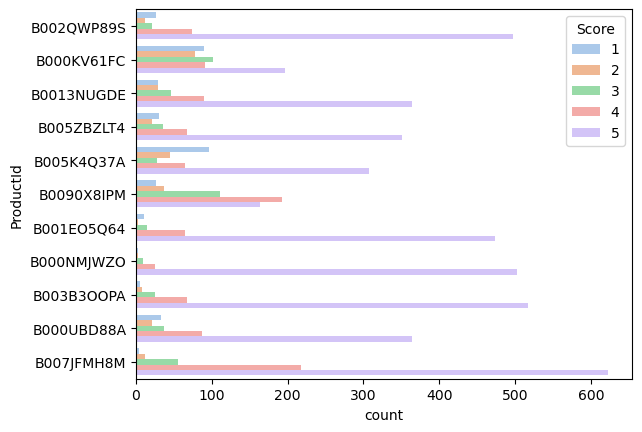

In [26]:
sns.countplot(y='ProductId', data = freq_prods_df, hue='Score', palette='pastel')

In [27]:
# QUESTION: frequent buyers vs not frequent buyers behaviour

In [28]:
# we consider frequent buyers => 50 purchases

In [30]:
sql_df['UserId'].value_counts()

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [35]:
frequency = sql_df['UserId'].value_counts()

In [36]:
# lambda is a anonymous function (you cant see its body)
# user is a pointer (aka looping variable) for the sql_df
# the logic (if) checks if the count is >= 50 for each line in the sql_df

In [34]:
sql_df['UserId'].apply(lambda user: 'Frequent' if frequency[user] >= 50 else "Not Frequent")

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: UserId, Length: 393933, dtype: object

In [37]:
sql_df['Buyer_type'] = sql_df['UserId'].apply(lambda user: 'Frequent' if frequency[user] >= 50 else "Not Frequent")

In [38]:
sql_df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1970-01-01 00:00:01,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1970-01-01 00:00:01,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1970-01-01 00:00:01,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [40]:
not_freq_df = sql_df[sql_df['Buyer_type'] == 'Not Frequent']

In [41]:
not_freq_df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1970-01-01 00:00:01,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1970-01-01 00:00:01,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1970-01-01 00:00:01,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [42]:
freq_df = sql_df[sql_df['Buyer_type'] == 'Frequent']

In [44]:
freq_df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1970-01-01 00:00:01,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frequent
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1970-01-01 00:00:01,Great taste and convenience,We really like the McCann's steel cut oats but...,Frequent
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1970-01-01 00:00:01,good,Good oatmeal. I like the apple cinnamon the b...,Frequent


In [55]:
# build score percentages for both df

In [49]:
not_freq_perc = not_freq_df['Score'].value_counts(normalize=True) * 100
freq_perc = freq_df['Score'].value_counts(normalize=True) * 100

In [46]:
# combine percentages into a songle DataFrame for plotting

In [50]:
score_comparison = pd.DataFrame({
    'Not Frequent': not_freq_perc,
    'Frequent': freq_perc
}).fillna(0)

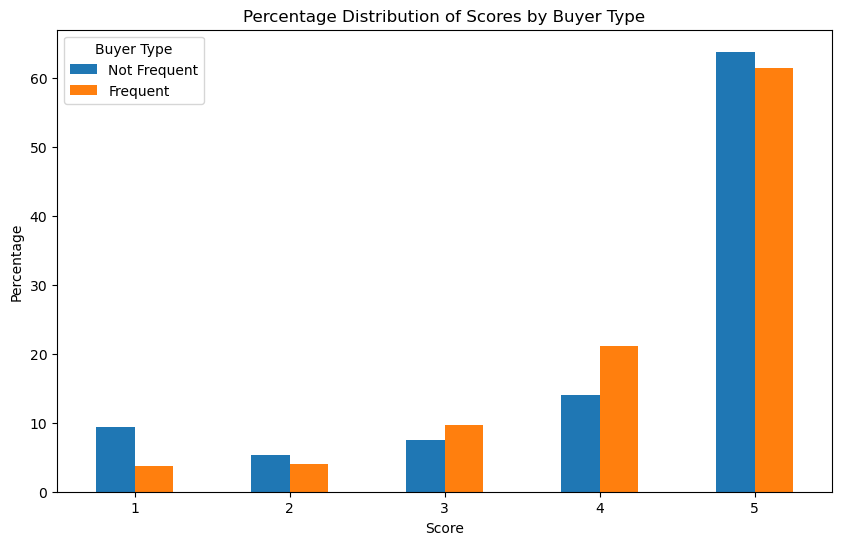

In [51]:
ax = score_comparison.plot(kind='bar', figsize=(10, 6))
ax.set_title('Percentage Distribution of Scores by Buyer Type')
ax.set_xlabel('Score')
ax.set_ylabel('Percentage')
ax.legend(title='Buyer Type')

plt.xticks(rotation=0)
plt.show()

In [52]:
# QUESTION: do frequent buyers write bigger reviews?

In [53]:
# we will use a box plot to obtain the percentiles

In [56]:
# calculate the total amount of characters in the Text column for both df

In [64]:
freq_df['Total_charac'] = freq_df['Text'].apply(len)
not_freq_df['Total_charac'] = not_freq_df['Text'].apply(len)

C:\Users\ruben\AppData\Local\Temp\ipykernel_41004\2198956293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_df['Total_charac'] = freq_df['Text'].apply(len)
C:\Users\ruben\AppData\Local\Temp\ipykernel_41004\2198956293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_freq_df['Total_charac'] = not_freq_df['Text'].apply(len)


In [65]:
freq_df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type,total_charac,Total_charac
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1970-01-01 00:00:01,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frequent,113,113
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1970-01-01 00:00:01,Great taste and convenience,We really like the McCann's steel cut oats but...,Frequent,244,244
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1970-01-01 00:00:01,good,Good oatmeal. I like the apple cinnamon the b...,Frequent,244,244


In [77]:
# with the .set_ylim we remove the outliers (rare occurences of dispaired values)

(0.0, 5000.0)

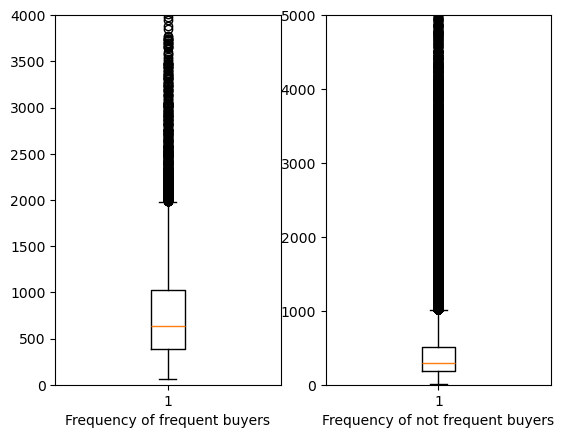

In [76]:
fig = plt.figure()

ax1  = fig.add_subplot(121)
ax1.boxplot(freq_df['Total_charac'])
ax1.set_xlabel('Frequency of frequent buyers')
ax1.set_ylim(0, 4000)

ax2  = fig.add_subplot(122)
ax2.boxplot(not_freq_df['Total_charac'])
ax2.set_xlabel('Frequency of not frequent buyers')
ax2.set_ylim(0, 5000)

In [78]:
# median (orange line) - middle value of the dataset
# For frequent buyers, the median is around 750 characters
# For not frequent buyers, the median is around 250 characters

# Interquartile Range (IQR) (Box) - the middle 50% of the data, from the 25th percentile (Q1) to the 75th percentile (Q3)
# For frequent buyers, the IQR ranges from about 400 to 1100 characters.
# For not frequent buyers, the IQR ranges from about 100 to 400 characters

# Whiskers - The whiskers extend from the box to the smallest and largest values within 1.5 times the IQR from the quartiles
# For frequent buyers, the whiskers extend from approximately 0 to 1500 characters.
# For not frequent buyers, the whiskers extend from approximately 0 to 600 characters.

# Outliers (Black Dots)

In [79]:
# QUESTION: Sentiment Analysis

In [81]:
# we install textblob library to analyse subjectivity and polarity

In [99]:
from textblob import TextBlob
sample = sql_df[0:50000]

In [100]:
polarity = []

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [101]:
len(polarity)

50000

In [102]:
sample['polarity'] = polarity

C:\Users\ruben\AppData\Local\Temp\ipykernel_41004\4182253960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['polarity'] = polarity


In [103]:
sample.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Buyer_type,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1970-01-01 00:00:01,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1970-01-01 00:00:01,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1970-01-01 00:00:01,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,0.0


In [94]:
# positive reviews have polarity > 0
# negative reviews have polarity < 0

In [104]:
sample_negative = sample[sample['polarity'] < 0]
sample_positive = sample[sample['polarity'] > 0]

In [105]:
sample_positive['Summary']

0                                    Good Quality Dog Food
4                                              Great taffy
5                                               Nice Taffy
6            Great!  Just as good as the expensive brands!
7                                   Wonderful, tasty taffy
                               ...                        
54245    Great way to have a cappuccino for around a bu...
54248                     My favorite nescafe dolce flavor
54249                                      My 2nd Favorite
54250                          Best of 5 flavors available
54252                                     pricey but good.
Name: Summary, Length: 29155, dtype: object

In [107]:
from collections import Counter

In [108]:
# to count the most common key words

In [109]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [110]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]